In [1]:
"""
Name: fd_MC.ipynb
Authors: Stephan Meighen-Berger
Testing the monte carlo branch
"""

'\nName: fd_MC.ipynb\nAuthors: Stephan Meighen-Berger\nTesting the monte carlo branch\n'

In [2]:
"""
Imports
"""
import numpy as np
import matplotlib.pyplot as plt
from scipy.stats import gamma
from scipy.signal import peak_widths, find_peaks
from scipy.optimize import root
from scipy.stats import gamma
import sys
from scipy.optimize import root
sys.path.append("../core/")

In [3]:
# Latex text rendering
from matplotlib import rc
rc('font',**{'family':'sans-serif','sans-serif':['Helvetica']})
rc('text', usetex=True)

In [4]:
# Importing dob module
from fourth_day import FD
from fd_config import config

In [5]:
# Looping over velocities
velocities = np.logspace(-2, 3, 3)
seconds = 3600
population = 100
distances = np.array([1e2])
light_yields_vel = []
light_yields_vel_avg = []
fd = FD(org_filter='generous', monte_carlo=True)

In [6]:
std_size = 6.
fontsize = 20.
lw=3.

In [7]:
seconds=100
results, _ = fd.solve(1000, 0.3, [10.], 1., seconds=seconds, border=1e2)

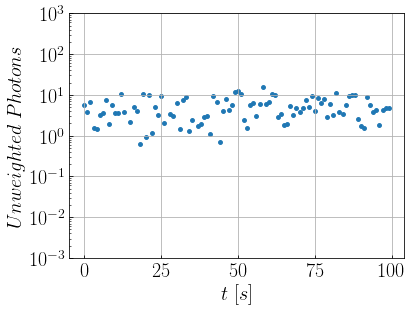

In [8]:
# Energy distributions
figure, ax = plt.subplots(figsize=(std_size, std_size * 6. / 8.))
ax.scatter(range(seconds), results[0], s=lw*5)
# ax.set_xlim(1e0, 1e3)
ax.set_ylim(1e-3, 1e3)
ax.set_xscale('linear')
ax.set_yscale('log')
ax.set_xlabel(r'$t\;[s]$', fontsize=fontsize)
ax.set_ylabel(r'$Unweighted\;Photons$', fontsize=fontsize)
ax.tick_params(axis = 'both', which = 'major', labelsize=fontsize, direction='in')
ax.tick_params(axis = 'both', which = 'minor', labelsize=fontsize, direction='in')
plt.grid(True)
plt.show()